# HGSC EDA
Standard analysis pipeline to explore the data.

In [1]:
import scanpy as sc

In [2]:
import squidpy as sq

/home/shaohenl/miniconda3/envs/py311_torch251_cuda121/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/shaohenl/miniconda3/envs/py311_torch251_cuda121/lib/python3.11/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/home/shaohenl/miniconda3/envs/py311_torch251_cuda121/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# https://www.nature.com/articles/s41590-024-01943-5

In [5]:
import os

regenerate = False
h5ad_file = "../../../data/HGSC/h5ad/ST_Discovery_so.h5ad"
if (not os.path.exists(h5ad_file)) or regenerate:
    adata = sc.read_mtx("G:/data/HGSC/Csv/ST_Discovery_so_counts.mtx").T
    metadata = pd.read_csv("G:/data/HGSC/Csv/ST_Discovery_so_metadata.csv", index_col=0)
    features = pd.read_csv("G:/data/HGSC/Csv/ST_Discovery_so_features.txt", index_col=0, header=None)
    features.index = features.index.str.strip() # remove trailing white space in gene names
    features.index.name = 'gene_symbol'
    adata.obs = metadata
    adata.var = features
    adata.obsm['spatial'] = adata.obs[['x', 'y']].to_numpy()
    adata.write_h5ad("G:/data/HGSC/h5ad/ST_Discovery_so.h5ad")
else:
    adata = sc.read_h5ad(h5ad_file)
    


In [6]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,samples,patients,sites_binary,cell.types,cell.subtypes,x,y
SMI_T10_F001_c1017,SMI,848,357,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,1493.3500,3151.233
SMI_T10_F001_c102,SMI,731,319,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,2623.2000,3607.450
SMI_T10_F001_c1062,SMI,236,155,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,850.5670,3143.833
SMI_T10_F001_c1064,SMI,609,300,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,3222.7300,3152.586
SMI_T10_F001_c1075,SMI,310,174,SMI_T10_F001,HGSC1,Adnexa,Malignant,Malignant,78.0125,3179.012
...,...,...,...,...,...,...,...,...,...,...
SMI_T14_F020_c5758,SMI,100,63,SMI_T14_F020,HGSC89,Omentum,TNK.cell,CD4.T.cell.DN,5170.4400,431.900
SMI_T14_F020_c734,SMI,141,88,SMI_T14_F020,HGSC89,Omentum,Fibroblast,Fibroblast,768.7000,3188.400
SMI_T14_F020_c875,SMI,78,60,SMI_T14_F020,HGSC89,Omentum,Malignant,Malignant,42.5833,3070.350
SMI_T14_F020_c3288,SMI,104,58,SMI_T14_F020,HGSC89,Omentum,Fibroblast,Fibroblast,48.9889,1751.740


In [7]:
adata.obs[adata.obs['cell.types'] == 'B.cell']['nCount_RNA'].mean()

201.1215711735108

In [8]:
sample_metadata = pd.read_excel("../../../data/HGSC/sample_metadata.xlsx", index_col=0, sheet_name='Table 2b', skiprows=1)
sample_metadata = sample_metadata[sample_metadata['dataset'] == 'Discovery']
sample_metadata

,dataset,platform,n_cells,median_tpc,mean_tpc,TMA,patients,sites_binary,age,stage,...,fu_time2,outcome,pfs,BRCA1_Somatic,BRCA2_Somatic,TP53_Somatic,BRCA1_Germline,BRCA2_Germline,TP53_Germline,tmb
profile,,,,,,,,,,,,,,,,,,,,,
SMI_T10_F001,Discovery,SMI,5660,205.0,238.675618,TMA 10,HGSC1,Adnexa,58.0,III,...,775.0,Alive,775.0,WT,P,P,US,US,US,6.80
SMI_T10_F002,Discovery,SMI,8821,364.0,393.318671,TMA 10,HGSC7,Adnexa,58.0,III,...,1013.0,Alive,1013.0,P,WT,LP,US,US,US,0.53
SMI_T10_F003,Discovery,SMI,2881,300.0,445.154460,TMA 10,HGSC8,Adnexa,65.0,IV,...,781.0,Alive,200.0,WT,WT,P,US,US,US,3.16
SMI_T10_F004,Discovery,SMI,3145,286.0,376.895390,TMA 10,HGSC13,Omentum,67.0,III,...,840.0,Dead (disease),161.0,WT,WT,P,US,US,US,2.63
SMI_T10_F005,Discovery,SMI,2187,165.0,267.202561,TMA 10,HGSC15,Adnexa,33.0,IV,...,845.0,Alive,845.0,WT,WT,P,P,US,US,2.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SMI_T14_F016,Discovery,SMI,2744,209.0,288.211735,TMA 14,HGSC61,Omentum,70.0,III,...,1955.0,Alive,1955.0,WT,WT,P,US,US,US,1.10
SMI_T14_F017,Discovery,SMI,3376,276.0,368.816647,TMA 14,HGSC63,Omentum,71.0,III,...,407.0,D/c to hospice (likely dead of disease),297.0,WT,WT,P,US,US,US,0.50
SMI_T14_F018,Discovery,SMI,9961,189.0,210.500452,TMA 14,HGSC89,Adnexa,53.0,III,...,1729.0,Dead (disease),412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


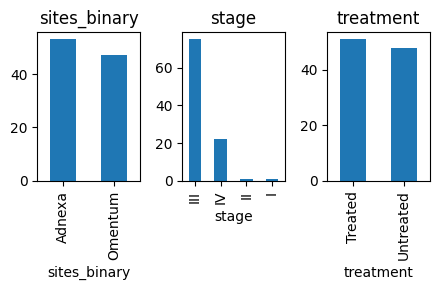

In [9]:
columns_of_interest = ['sites_binary', 'stage', 'treatment']
fig, axes = plt.subplots(1, len(columns_of_interest), figsize=(len(columns_of_interest) * 1.5, 3))
for i, column in enumerate(columns_of_interest):
    sample_metadata[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()

In [10]:
mask = (sample_metadata['sites_binary'] == 'Adnexa') & (sample_metadata['treatment'] == 'Untreated')
samples_of_interest = sample_metadata.index[mask].tolist()

In [11]:
# plt.hist(adatas[0].obsp['spatial_distances'].data * .18, bins=range(0, 60, 1))

In [12]:
import sys
sys.path.append("../..")
import steamboat as sf
import steamboat.integrated_model
import torch
device = 'cuda'

# pos enc

In [25]:
adatas = []
for i in adata.obs['samples'].unique():
    # if i in samples_of_interest:
    adatas.append(adata[adata.obs['samples'] == i])
    adatas[-1].obs['global'] = 0

/tmp/ipykernel_1162104/3819351686.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
/tmp/ipykernel_1162104/3819351686.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
/tmp/ipykernel_1162104/3819351686.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
/tmp/ipykernel_1162104/3819351686.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
/tmp/ipykernel_1162104/3819351686.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adatas[-1].obs['global'] = 0
/tmp/ipykernel_1162104/3819351686.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.

In [26]:
adatas = sf.prep_adatas(adatas, log_norm=False)
dataset = sf.make_dataset(adatas, sparse_graph=True, regional_obs=['global'])

  0%|          | 0/100 [00:00<?, ?it/s]

Using ['global'] as regional annotations.


  0%|          | 0/100 [00:00<?, ?it/s]

In [27]:
# A6000 w/o sending everything to GPU in advance: 5:20/4:20/3:40 per 200 epochs
# A6000 w/ sending everything to GPU in advance: 1:00/1:00/1:00 per 200 epochs 

In [28]:
cuda_dataset = dataset.to('cuda')

In [30]:
sf.set_random_seed(0)
model = sf.integrated_model.Steamboat(adata.var_names.tolist(), n_heads=10, n_scales=3)
model = model.to(device)

In [ ]:
model.fit(cuda_dataset, entry_masking_rate=0.2, feature_masking_rate=0.1, 
          flat_k_penalty=0., flat_k_penalty_args={'kind': 'cosine'},
          weight_l2_penalty=1e-5,
          max_epoch=10000, 
          loss_fun=torch.nn.HuberLoss(delta=0.1),
          opt=torch.optim.Adam, opt_args=dict(lr=0.1), stop_eps=1e-4, report_per=200, stop_tol=1000, device=device)

[2024-12-04 13:09:33,779::train::INFO] Epoch 1: train_loss 0.03784, reg 0.000051
[2024-12-04 13:10:35,548::train::INFO] Epoch 201: train_loss 0.02802, reg 0.000367
[2024-12-04 13:11:36,615::train::INFO] Epoch 401: train_loss 0.02801, reg 0.000371
[2024-12-04 13:12:37,981::train::INFO] Epoch 601: train_loss 0.02801, reg 0.000364


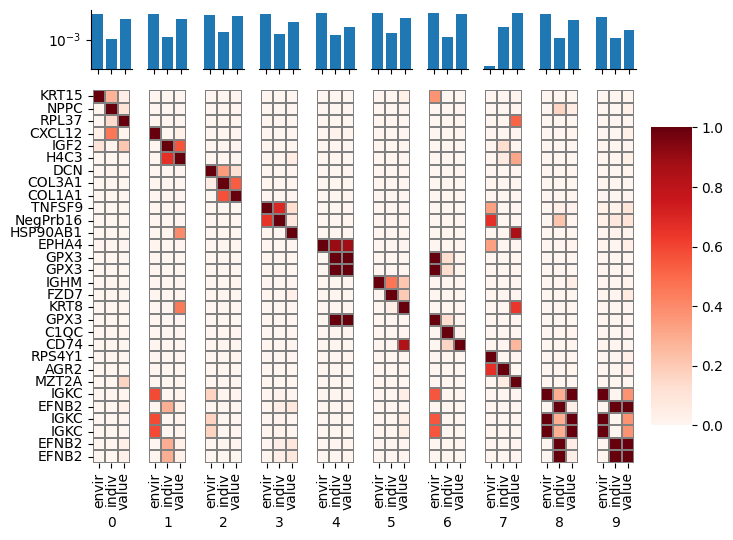

In [21]:
import numpy as np
def plot_regional_transforms(model, top: int = 3, reorder: bool = True, 
                    figsize: str | tuple[float, float] = 'auto', 
                    vmin: float = 0., vmax: float = 1.,
                    xticklabels: tuple[str, str, str] = ("envir", "indiv", 'value')):
    """Plot all metagenes

    :param model: Steamboat model
    :param top: Number of top genes per metagene to plot, defaults to 3
    :param reorder: Reorder the genes by metagene, or keep the orginal ordering, defaults to False
    :param figsize: Size of the figure, defaults to 'auto'
    :param vmin: minimum value in the color bar, defaults to 0.
    :param vmax: maximum value in the color bar, defaults to 1.
    """
    n_heads = model.spatial_gather.n_heads
    n_scales = model.spatial_gather.n_scales

    q = model.spatial_gather.q.weight.detach().cpu()
    k = model.spatial_gather.k.weight.detach().cpu()
    v = model.spatial_gather.v.weight.detach().cpu().T
    # switch = model.spatial_gather.switch().detach().cpu()

    if top > 0:
        if reorder:
            rank_v = np.argsort(-v, axis=1)[:, :top]
            rank_q = np.argsort(-q, axis=1)[:, :top]
            rank_k = np.argsort(-k, axis=1)[:, :top]
            feature_mask = {}
            for i in range(n_heads):
                for j in rank_k[i, :]:
                    feature_mask[j] = None
                for j in rank_q[i, :]:
                    feature_mask[j] = None
                for j in rank_v[i, :]:
                    feature_mask[j] = None
            feature_mask = list(feature_mask.keys())
        else:
            rank_v = rank(v)
            rank_q = rank(q)
            rank_k = rank(k)
            max_rank = np.max(np.vstack([rank_v, rank_q, rank_k]), axis=0)
            feature_mask = (max_rank > (max_rank.max() - 3))
            
        chosen_features = np.array(model.features)[feature_mask]
    else:
        feature_mask = list(range(len(model.features)))
        chosen_features = np.array(model.features)

    if figsize == 'auto':
        figsize = (n_heads * 0.49 + 2 + .5, len(chosen_features) * 0.15 + .25 + .75)
    # print(figsize)
    fig, axes = plt.subplots(2, n_heads + 1, sharey='row', sharex='col',
                                          figsize=figsize, 
                                          height_ratios=(.75, len(chosen_features) * .15 + .25))
    plot_axes = axes[1]
    bar_axes = axes[0]
    cbar_ax = plot_axes[-1].inset_axes([0.0, 0.1, 1.0, .8])
    common_params = {'linewidths': .05, 'linecolor': 'gray', 'yticklabels': chosen_features, 
                     'cmap': 'Reds', 'cbar_kws': {"orientation": "vertical"}, 'square': True,
                     'vmax': vmax, 'vmin': vmin}

    for i in range(0, n_heads):
        title = ''
        what = f'{i}'
        
        to_plot = np.vstack((k[i, feature_mask],
                             q[i, feature_mask],
                             v[i, feature_mask])).T
        
        true_vmax = to_plot.max(axis=0)
        # print(true_vmax)
        to_plot /= true_vmax
 
        bar_axes[i].bar(np.arange(len(true_vmax)) + .5, true_vmax)
        bar_axes[i].set_xticks(np.arange(len(true_vmax)) + .5, [''] * len(true_vmax))
        bar_axes[i].set_yscale('log')
        bar_axes[i].set_title(title, size=10, fontweight='bold')
        if i != 0:
            bar_axes[i].get_yaxis().set_visible(False)
        for pos in ['right', 'top', 'left']:
            if pos == 'left' and i == 0:
                continue
            else:
                bar_axes[i].spines[pos].set_visible(False)
        sns.heatmap(to_plot, xticklabels=xticklabels, ax=plot_axes[i], 
                    **common_params, cbar_ax=cbar_ax)
        plot_axes[i].set_xlabel(f"{what}")
        
    # All text straight up
    for i in range(n_heads):
        plot_axes[i].set_xticklabels(plot_axes[i].get_xticklabels(), rotation=90)

    for i in range(1, n_heads):
        plot_axes[i].get_yaxis().set_visible(False)

    # Remove duplicate cbars
    bar_axes[-1].set_visible(False)

    plot_axes[-1].get_yaxis().set_visible(False)
    plot_axes[-1].get_xaxis().set_visible(False)
    for pos in ['right', 'top', 'bottom', 'left']:
        plot_axes[-1].spines[pos].set_visible(False)
    # axes[-1].set_visible(False)

    fig.align_xlabels()
    plt.tight_layout()

plot_regional_transforms(model, top=1)

In [22]:
# Ego, local, or global?
import scipy as sp
import scipy.sparse
from tqdm.auto import tqdm
def annotate_adatas(adatas: list[sc.AnnData], dataset, model, 
                    device='cuda', get_recon=False):
    """_summary_

    :param adatas: _description_
    :param dataset: _description_
    :param model: _description_
    :param device: _description_, defaults to 'cuda'
    """
    # Safeguards
    assert len(adatas) == len(dataset), "mismatch in lenghths of adatas and dataset"
    for adata, data in zip(adatas, dataset):
        assert adata.shape[0] == data[0].shape[0], f"adata[{i}] has {adata.shape[0]} cells but dataset[{i}] has {data[0].shape[0]}."

    for i, (x, adj_list, regional_xs, regional_adj_lists) in tqdm(enumerate(dataset), total=len(dataset)):
        adj_list = adj_list.squeeze(0).to(device)
        x = x.squeeze(0).to(device)
        regional_adj_lists = [regional_adj_list.to(device) for regional_adj_list in regional_adj_lists]
        regional_xs = [regional_x.to(device) for regional_x in regional_xs]
        
        with torch.no_grad():
            res, details = model(adj_list, x, x, regional_adj_lists, regional_xs, get_details=True)
            
            if get_recon:
                adatas[i].obsm['X_recon'] = res.cpu().numpy()

            adatas[i].obsm['embq'] = details['embq'].cpu().numpy()
            
            adatas[i].obsm['embk'] = details['embk'][0].cpu().numpy()
            for j, emb in enumerate(details['embk'][1]):
                adatas[i].uns[f'embk_{j}'] = emb.cpu().numpy()
            
            adatas[i].obsm['ego_attn'] = details['attnm'][0].cpu().numpy()
            adatas[i].obsm['local_attn'] = details['attnm'][1].cpu().numpy()
            for j, matrix in enumerate(details['attnm'][2]):
                adatas[i].obsm[f'regional_attn_{j}'] = matrix.cpu().numpy()

            # local attention (as graph)
            for j in range(model.spatial_gather.n_heads):
                w = details['attnp'][1].cpu().numpy()[:, j, :].flatten()
                # print(details['attnp'][1].cpu().shape)
                # print(len(w))
                uv = adj_list.cpu().numpy()
                u = uv[0]
                v = uv[1]
                # print(len(u))
                # print(len(v))
                if uv.shape[0] == 3: # masked for unequal neighbors
                    m = (uv[2] > 0)
                    w, u, v = w[m], u[m], v[m]
                adatas[i].obsp[f'local_attn_{j}'] = sp.sparse.csr_matrix((w, (u, v)), 
                                                                            shape=(adatas[i].shape[0], 
                                                                                adatas[i].shape[0]))
            
annotate_adatas(adatas, dataset, model, get_recon=False)

  0%|          | 0/27 [00:00<?, ?it/s]

In [23]:
# Embedding for cell-cell interaction?
# Could there be two pairs of cell types with similar interaction?
# E.g.???

In [24]:
adatas[i].obsm['ego_attn'].shape

TypeError: list indices must be integers or slices, not str

In [ ]:
# Ego, local, or global?
# 1. Only matters if the head is doing something ()
i = 0

quantile = 1 - 0.01

ego = np.quantile(adatas[i].obsm['ego_attn'], quantile, axis=0)
local = np.quantile(adatas[i].obsm['local_attn'], quantile, axis=0)
regional = np.quantile(adatas[i].obsm['regional_attn_0'], quantile, axis=0)

In [ ]:
fig, ax = plt.subplots(figsize=(3, 1))
sns.heatmap(np.vstack([ego, local, regional]), vmax=.5, ax=ax)
ax.set_yticklabels(['ego', 'local', 'regional'], rotation=0)

In [ ]:
fig, ax = plt.subplots(figsize=(3, 1))
matrix = np.vstack([ego, local, regional])
sns.heatmap(matrix / matrix.sum(axis=0), vmax=.5, ax=ax)
ax.set_yticklabels(['ego', 'local', 'regional'], rotation=0)

In [ ]:
adatas[0].obs['cell.types.nolc'] = adatas[0].obs['cell.types'].str.replace('_LC', '')

fig, axes = plt.subplots(1, 10, figsize=(10, 3.5))
for i_comp in range(10):
    adatas[0].obs['q'] = adatas[0].obsm['embq'][:, i_comp]
    adatas[0].obs['k'] = adatas[0].obsm['embk'][:, i_comp]
    adatas[0].obs['a'] = adatas[0].obsm['ego_attn'][:, i_comp]

    temp_adata = adatas[0].copy()
    good_classes = adatas[0].obs['cell.types.nolc'].value_counts()
    good_classes = good_classes[good_classes > temp_adata.shape[0] * 0.01].index.to_list()
    temp_adata = temp_adata[temp_adata.obs['cell.types.nolc'].isin(good_classes)]

    #plt.subplot(1, 10, i_comp + 1)
    sc.pl.matrixplot(temp_adata, ['a', 'q', 'k'], 'cell.types.nolc', standard_scale='var', cmap='Reds', title=f'Comp {i_comp}')

In [ ]:
# 7 is the most ego, what is it?
i_comp = 7
adatas[0].obs['q'] = adatas[0].obsm['embq'][:, i_comp]
adatas[0].obs['k'] = adatas[0].obsm['embk'][:, i_comp]
adatas[0].obs['a'] = adatas[0].obsm['ego_attn'][:, i_comp]

sq.pl.spatial_scatter(adatas[0], color=['a', 'q', 'k'], shape=None, figsize=(2, 2), size=.25, 
                        legend_fontsize=9, cmap='Reds', ncols=3, colorbar=False, vmin=0., 
                        wspace=.0, outline=False, frameon=False, 
                        title=[f'{i_comp} Attention', 'Individual', 'Environment'])

temp_adata = adatas[0].copy()
good_classes = adatas[0].obs['cell.types'].value_counts()
good_classes = good_classes[good_classes > temp_adata.shape[0] * 0.01].index.to_list()
temp_adata = temp_adata[temp_adata.obs['cell.types'].isin(good_classes)]

fig, ax = plt.subplots(figsize=(2, 3.5))
sc.pl.matrixplot(temp_adata, ['a', 'q', 'k'], 'cell.types', standard_scale='var', ax=ax, cmap='Reds')

In [ ]:
# 3, 5, 6 are the most regional & local
for d in range(10):
    sample_metadata[f'embk_0_{d}'] = float('nan')
    for i in range(len(adatas)):
        val = adatas[i].uns['embk_0'][0, d]
        key = adatas[i].obs.samples.astype(str).unique().item()
        sample_metadata.loc[key, f'embk_0_{d}'] = val

In [ ]:
sample_metadata2 = sample_metadata.loc[samples_of_interest]
sample_metadata2.head().style

In [ ]:
sample_metadata2['pfs']

In [ ]:
sns.boxplot(sample_metadata2, x='stage', y='pfs')

In [ ]:
def test_helper(df, x, y, groups, test=sp.stats.mannwhitneyu):
    assert len(groups) == 2
    a = (df[x] == groups[0])
    b = (df[x] == groups[1])
    return test(df.loc[a, y].dropna(), df.loc[b, y].dropna())

test_helper(df=sample_metadata2, x='stage', y='pfs', groups=['III', 'IV'], test=sp.stats.mannwhitneyu)

In [ ]:
for d in range(10):
    print(d, test_helper(df=sample_metadata2, x='stage', y=f'embk_0_{d}', groups=['III', 'IV'], test=sp.stats.mannwhitneyu).pvalue)

In [ ]:
for d in range(10):
    a = sample_metadata2['pfs']
    b = sample_metadata2[f'embk_0_{d}']
    na_mask = a.isna()
    a = a[~na_mask]
    b = b[~na_mask]
    res = sp.stats.spearmanr(a, b)
    print(f'{d}: f = {res.statistic:.2f}, p = {res.pvalue:.2f}')

In [ ]:
ds = [3, 5, 6]
cols = ['stage', 'pfs', 'outcome']
params = {'stage': {'order': ['I', 'III', 'IV']}}
rotations = {'outcome': 40}
fig, axes = plt.subplots(len(cols), len(ds), figsize=(2.5 * len(ds), len(cols) * 2.5), squeeze=False)
for plt_j, d in enumerate(ds):
    for plt_i, col in enumerate(cols):
        ax = axes[plt_i, plt_j]
        param = params.get(col, {})
        if sample_metadata2[col].dtype == float:
            sns.scatterplot(sample_metadata2, x=col, y=f'embk_0_{d}', ax=ax, **param)
        else: # categorical or strings
            sns.boxplot(sample_metadata2, x=col, y=f'embk_0_{d}', ax=ax, fliersize=1, **param)
            if col in rotations:
                ax.set_xticklabels(ax.get_xticklabels(), rotation=rotations[col], ha='right', rotation_mode ='anchor')
plt.tight_layout()

In [ ]:
# 3, 5, 6 are the most regional & local
i_comp = 5
adatas[0].obs['q'] = adatas[0].obsm['embq'][:, i_comp]
adatas[0].obs['k'] = adatas[0].obsm['embk'][:, i_comp]
adatas[0].obs['a'] = adatas[0].obsm['ego_attn'][:, i_comp]

sq.pl.spatial_scatter(adatas[0], color=['a', 'q', 'k'], shape=None, figsize=(2, 2), size=.25, 
                        legend_fontsize=9, cmap='Reds', ncols=3, colorbar=False, vmin=0., 
                        wspace=.0, outline=False, frameon=False, 
                        title=[f'{i_comp} Attention', 'Individual', 'Environment'])

temp_adata = adatas[0].copy()
good_classes = adatas[0].obs['cell.types'].value_counts()
good_classes = good_classes[good_classes > temp_adata.shape[0] * 0.01].index.to_list()
temp_adata = temp_adata[temp_adata.obs['cell.types'].isin(good_classes)]

fig, ax = plt.subplots(figsize=(2, 3.5))
sc.pl.matrixplot(temp_adata, ['a', 'q', 'k'], 'cell.types', standard_scale='var', ax=ax, cmap='Reds')

In [ ]:
# What are some possible pathways between B cells and monocytes?
lrdb_full = pd.read_excel("G:/data/HGSC/sample_metadata.xlsx", index_col=None, sheet_name='Table 5c', skiprows=1)
lrdb_full = lrdb_full[(lrdb_full['GeneA'].isin(adatas[0].var_names) & 
                       lrdb_full['GeneB'].isin(adatas[0].var_names))]
lrdb_full.index = lrdb_full['PairID']
lrdb_full

In [ ]:
# import gseapy
# msig = gseapy.Msigdb()
# gmt = msig.get_gmt(category='c2.all', dbver="2024.1.Hs") | msig.get_gmt(category='c5.all', dbver="2024.1.Hs")

# monocyte_subset = set()
# for i in gmt:
#     if 'MONOCYT' in i:
#         for j in gmt[i]:
#             if j in adatas[0].var_names:
#                 monocyte_subset.add(j)

# bcell_subset = set()
# for i in gmt:
#     if 'BCELL' in i or 'B_CELL' in i:
#         for j in gmt[i]:
#             if j in adatas[0].var_names:
#                  bcell_subset.add(j)

# print(len(monocyte_subset), len(bcell_subset))

In [ ]:
# lrdb = lrdb_full[(lrdb_full['GeneA'].isin(monocyte_subset) & lrdb_full['GeneB'].isin(bcell_subset))]
lrdb = lrdb_full

In [ ]:
n_heads = model.spatial_gather.n_heads
var = pd.DataFrame(np.vstack([model.spatial_gather.k.weight.detach().cpu().numpy(),
                              model.spatial_gather.q.weight.detach().cpu().numpy()]).T,
                   index=adata.var_names,
                   columns=[f'k_{i}' for i in range(n_heads)] + [f'q_{i}' for i in range(n_heads)])

In [ ]:
d = 10
lr_df = pd.DataFrame(var.loc[lrdb['GeneA'], f'q_{d}'].values * var.loc[lrdb['GeneB'], f'k_{d}'].values,
                     index=lrdb.index, columns=['score'])

observation = lr_df['score'].sum()

null_distr_0 = np.outer(var[f'q_{d}'].values, var[f'k_{d}'].values).flatten()
# null_distr_0 = np.outer(var.loc[lrdb_full['GeneA'], f'k_{d}'].values, 
#                       var.loc[lrdb_full['GeneB'], f'q_{d}'].values).flatten()
m = 5000
null_distr = [np.sum(np.random.choice(null_distr_0, size=lr_df.shape[0])) for i in range(m)]
(null_distr > observation).sum() / m
# lr_df['p'] = np.mean(null_distr[:, None] >= lr_df['score'].values, axis=0)
# lr_df['p_adj'] = sp.stats.false_discovery_control(lr_df['p'])
# lr_df.sort_values('p_adj')

In [ ]:
sq.pl.spatial_scatter(adatas[0], color='cell.types', groups=['B.cell', 'B.cell_LC', 'Monocyte'], shape=None)

In [ ]:
for i_comp in range(10):
    adatas[0].obs['q'] = adatas[0].obsm['embq'][:, i_comp]
    adatas[0].obs['k'] = adatas[0].obsm['embk'][:, i_comp]
    
    sq.pl.spatial_scatter(adatas[0], color=['q', 'k'], shape=None, figsize=(2, 2), size=.25, 
                          legend_fontsize=9, cmap='Reds', ncols=2, colorbar=False, vmin=0., 
                          wspace=.0, outline=False, frameon=False, 
                          title=[f'{i_comp} Individual', 'Environment'])
